# Round 2


### Dealing with the data


In [116]:
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [117]:
df.columns

Index(['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'employmentstatus', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size', 'vehicle type', 'months'],
      dtype='object')

In [118]:

def dataframe(df):
    df.shape
    cols = []
    for column in df.columns:
        cols.append(column.lower())
    df.columns = cols
    df = df.drop('unnamed: 0',axis=1)
    df.dropna(inplace=True)
    df['effective to date'] = pd.to_datetime(df['effective to date'])
    df['months'] = df['effective to date'].dt.month
    return df


df = dataframe(pd.read_csv('marketing_customer_analysis.csv'))

### Show DataFrame info.

In [119]:
df.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,months
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
10,HG93801,Arizona,5154.764074,No,Extended,High School or Below,2011-01-02,Employed,M,82730,...,1,Corporate Auto,Corporate L3,Offer2,Branch,442.521087,SUV,Large,A,1
13,KR82385,California,5454.587929,No,Basic,Master,2011-01-26,Employed,M,66334,...,4,Personal Auto,Personal L3,Offer4,Call Center,331.200000,Two-Door Car,Medsize,A,1
16,FH51383,California,5326.677654,No,Basic,High School or Below,2011-02-07,Employed,F,76717,...,6,Personal Auto,Personal L3,Offer4,Call Center,300.528579,Two-Door Car,Large,A,2


### Describe DataFrame.

In [120]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer lifetime value,4543.0,8033.714059,6959.529443,1904.000852,4039.089902,5846.520588,8936.596938,83325.381190
income,4543.0,37453.033238,30257.399536,0.000000,0.000000,34455.000000,61560.000000,99961.000000
monthly premium auto,4543.0,93.773278,35.093661,61.000000,69.000000,83.000000,110.000000,298.000000
months since last claim,4543.0,15.111820,10.157925,0.000000,6.000000,14.000000,23.000000,35.000000
months since policy inception,4543.0,48.153863,28.146904,0.000000,24.000000,47.000000,72.000000,99.000000
number of open complaints,4543.0,0.386309,0.907553,0.000000,0.000000,0.000000,0.000000,5.000000
number of policies,4543.0,2.980189,2.390362,1.000000,1.000000,2.000000,4.000000,9.000000
total claim amount,4543.0,436.477525,295.026990,0.099007,265.686145,384.000000,552.000000,2893.239678
months,4543.0,1.469734,0.499138,1.000000,1.000000,1.000000,2.000000,2.000000


In [121]:
df['response'].value_counts(ascending=True)

Yes     641
No     3902
Name: response, dtype: int64

In [122]:
df['response'].values
df['response'].value_counts()
df['response'].shape

(4543,)

### Show a plot of the total number of responses.

(<AxesSubplot:>,
 No     3902
 Yes     641
 Name: response, dtype: int64)

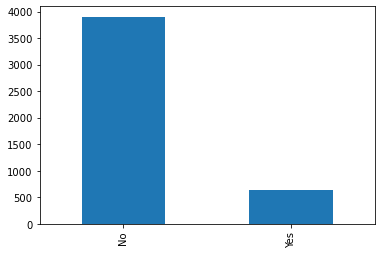

In [123]:
df['response'].value_counts().plot(kind='bar'), df['response'].value_counts()

### Show a plot of the response rate by the sales channel.

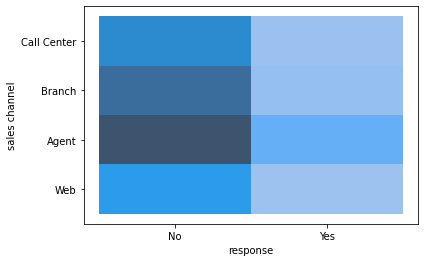

In [124]:
# sns.barplot(x="response", y="sales channel", data=df)
sns.histplot(binwidth=2, x="response", y="sales channel", data=df, stat="count", multiple="stack")

plt.show()

### Show a plot of the response rate by the total claim amount.


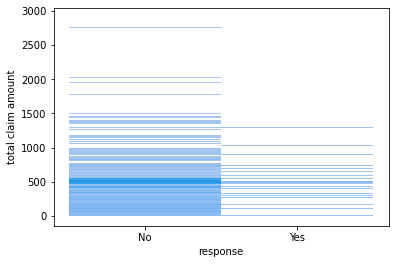

In [112]:
sns.histplot(binwidth=2, x='response', y="total claim amount", data=df, stat="count", multiple="stack")
plt.show()

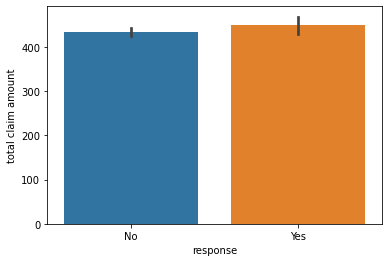

In [125]:
sns.barplot(x="response", y="total claim amount", data=df)
plt.show()

### Show a plot of the response rate by income.



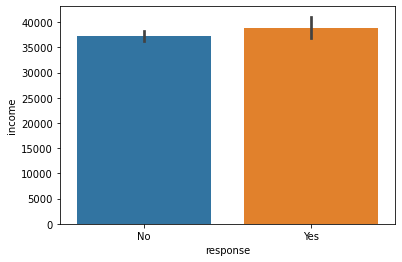

In [127]:
sns.barplot(x="response", y="income", data=df)
plt.show()